# Milestones 1

---

# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

**Title** : Telco Customer Churn

**Konteks** :
"Prediksi perilaku untuk mempertahankan pelanggan. Kami akan menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus".

**Konten** :
Setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan yang dijelaskan pada kolom Metadata.

Dataset mencakup informasi tentang :
- Pelanggan yang pergi dalam sebulan terakhir - Churn
- Layanan yang telah didaftarkan oleh setiap pelanggan - Telepon, internet, multiple lines, online security, online backup, service protection, tech support dan streaming TV dan movie.
- Informasi akun pelanggan - sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan dan total tagihan.
- Info demografis tentang pelanggan - Jenis kelamin, rentang usia, dan jika mereka berpasangan dan tanggungan.
- Catatan : kolom SeniorCitizen adalah usia pelanggan diatas 65 tahun (Yes : 1, No : 0).

Objective :
- Mampu membuat model Machine Learning untuk memprediksi pelanggan yang akan tetap menggunakan produk dari Telco atau pergi (Churn)
- Mampu membuat model Machine Learning dengan menggunakan Tensor-flow.

# 2. Import Pustaka
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# !pip install feature_engine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Split Dataset Train and Test
from sklearn.model_selection import train_test_split

# Handling Outliers and Missing Values
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import OutlierTrimmer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.impute import SimpleImputer


# Feature Scaling and Feature Encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# SMOTE
from imblearn.over_sampling import SMOTE

# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, RandomUniform, RandomNormal
from tensorflow.keras.models import Model
import tensorflow as tf

# Model Evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score


# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Dataset

# df = pd.read_csv('Telco-Customer-Churn.csv')
df = pd.read_csv('D:\Project\hacktiv8_project\dataset\milestone_dataset/Telco-Customer-Churn.csv')
df_ori = df.copy()
pd.set_option('display.max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# cek jumlah angka distribusi di kolom Target
df['Churn'].value_counts()/len(df)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Dataset ini termasuk **Imbalance Dataset**. Gunakan SMOTE untuk membuat dataset menjadi balance.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [8]:
# cek missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values pada dataset ini.

## 4.1. Mengetahui pelanggan yang pergi (Churn) berdasarkan gender.

In [9]:
new_df = df.copy()
gender_churn = pd.crosstab(new_df['gender'], new_df['Churn'])
gender_churn

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


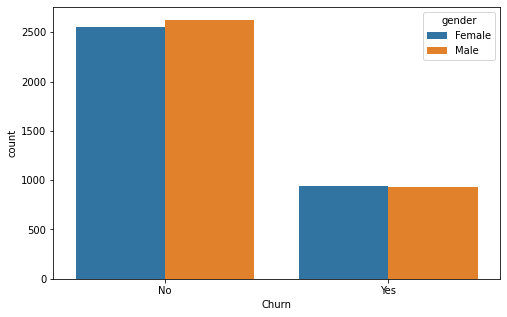

In [10]:
# new_df['Churn'] = new_df['Churn'].replace({'No' : 0, 'Yes' : 1})
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', hue='gender', data=new_df)

Berdasarkan gambar diatas, terlihat bahwa kami masih bisa banyak mempertahankan pelanggan untuk tetap berlangganan pada produk kami dibanding dengan pelanggan yang pergi.

## 4.2. Mengetahui Churn berdasarkan Total Charge (total tagihan yang harus dibayar oleh pelanggan).

In [11]:
new_df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Tipe data pada kolom `TotalCharges` masih berbentuk string, harus diubah terlebih dahulu tipe datanya dari string ke numerik.

In [12]:
# total_charge = new_df.groupby('Churn').sum()[['TotalCharges']]
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
total_charge = new_df.groupby('Churn').sum()[['TotalCharges']]
total_charge

,TotalCharges
Churn,
No,13193241.8
Yes,2862926.9


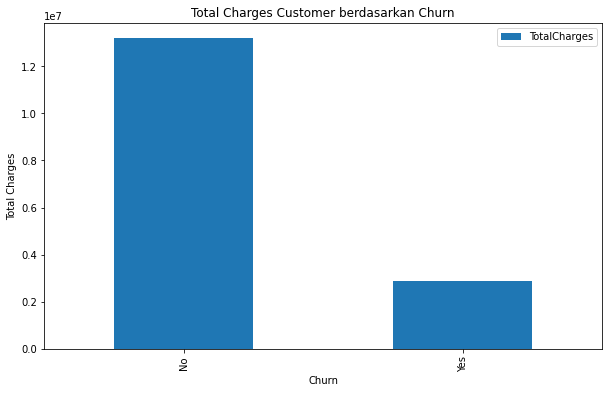

In [15]:
total_charge.plot(kind='bar', figsize=(10,6))
plt.title('Total Charges Customer berdasarkan Churn')
plt.ylabel('Total Charges')

plt.show()

Berdasarkan grafik diatas, meskipun beberapa pelanggan sudah pergi atau tidak berlangganan sejak sebulan terakhir, terlihat hasil pendapatan dari customer yang membayar total charges dari customer yang tetap berlangganan pada produk kami masih terbilang besar, yaitu sebesar 13193241.8.

## 4.3. Mengetahui Kontrak Pelanggan dalam menggunakan produk berdasarkan Churn.

In [16]:
new_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
contract_churn = pd.crosstab(new_df['Contract'], new_df['Churn'])
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


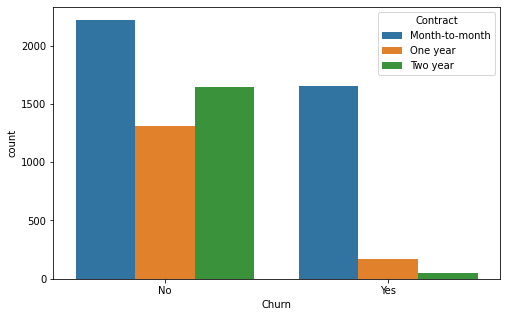

In [18]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', hue='Contract', data=new_df)

Berdasarkan gambar diatas, pelanggan baik itu masih tetap berlangganan maupun tidak, kontrak penggunaan produk yang dipakai oleh pelanggan lebih banyak melakukan kontrak secara perbulan dibanding dengan kontrak satu tahun maupun dua tahun.

In [19]:
contract_month_charges = new_df.groupby('Contract').sum()[['MonthlyCharges']]
contract_month_charges

,MonthlyCharges
Contract,
Month-to-month,257294.15
One year,95816.60
Two year,103005.85


Tagihan perbulan yang ditanggung oleh pelanggan yang mengambil kontrak perbulan lebih mahal dibandingkan dengan tagihan perbulan untuk pelanggan yang mengambil kontrak pertahun atau 2 tahun.

## 4.4. Mengetahui Churn berdasarkan pelanggan yang memiliki pasangan dan memiliki tangungan.

In [20]:
part_depend_df = new_df[(new_df['Partner'] == 'Yes') & (new_df['Dependents'] == 'Yes')]
part_depend_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
24,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


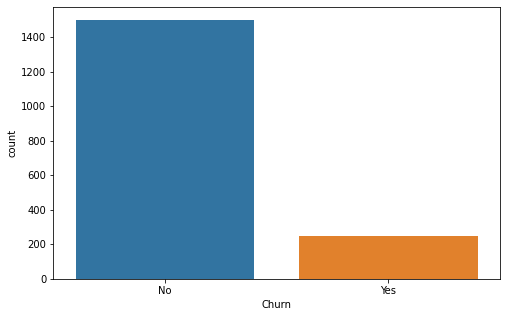

In [21]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', data=part_depend_df)

Berdasarkan gambar di atas, meskipun pelanggan kami mempunyai pasangan dan tanggungan, mereka lebih banyak tetap menggunakan layanan kami dibanding dengan pelanggan yang pergi.

## 4.5. Cek korelasi

<AxesSubplot:>

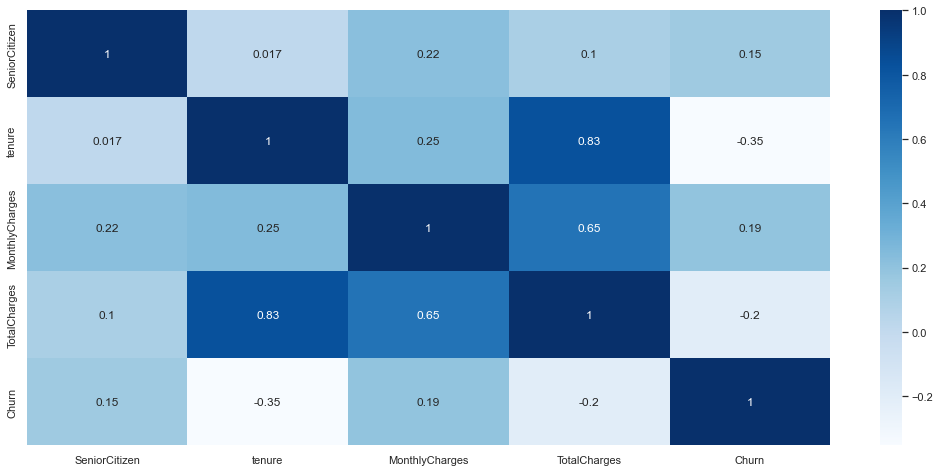

In [22]:
new_df['Churn'] = new_df['Churn'].replace({'No' : 0, 'Yes' : 1})
sns.set(rc={'figure.figsize':(18,8)})
sns.heatmap(new_df.corr(), annot=True, cmap='Blues')

Analisis korelasi :
- Nilai korelasi antara `tenure` dengan `TotalCharges` adalah 0.83. Bisa terbilang besar, yang artinya perubahan pada data kolom `TotalCharges` dipengaruhi oleh `tenure`.
- Dilihat dari visualisasi korelasi kolom-kolom feature numerik terhadap kolom `Churn` masih kecil. Nilai korelasinya dibawah 0.5.

Karena kolom `SeniorCitizen` adalah tipe kolom kategorikal, nilainya akan diubah terlebih dahulu dari numerik menjadi string yang mana 0 = No, dan 1 = Yes.

In [23]:
new_df['SeniorCitizen'] = new_df['SeniorCitizen'].replace({ 0 : 'No', 1 : 'Yes'})

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



Kita akan membagi dataset menjadi dua, yaitu : Dataset Train-test sebagai membuat model dan Data Inference sebagai data diluar dari dataset yang digunakan untuk menguji model atau disebut juga sebagai data prediksi. Data Inference diambil 100 baris dari data original.

In [24]:
df_inf = new_df.sample(100, random_state=17)
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3616,8707-RMEZH,Female,Yes,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,0
2055,1216-BGTSP,Male,No,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,0
5394,5118-MUEYH,Female,No,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,0
3697,4821-SJHJV,Female,No,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,0
2516,8245-UMPYT,Female,Yes,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,4094-NSEDU,Female,Yes,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.25,1973.75,1
919,5149-TGWDZ,Female,No,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,104.55,2239.40,0
3837,3932-CMDTD,Female,No,No,No,4,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,105.65,443.90,1
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0


In [25]:
df_train_test = new_df.drop(df_inf.index)
df_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [26]:
# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

## Split Dataset

Definisikan variabel X sebagai data yang akan digunakan sebagai alat prediksi dan variabel y sebagai data yang akan diprediksi. 

Saya akan membuat sebuah model yang mana akan memprediksikan pelanggan tetap dan pelanggan yang pergi (Churn).

In [27]:
# Split X dan y

X = df_train_test.drop(['Churn'], axis=1) # Features = alat/kolom untuk membuat prediksi
y = df_train_test['Churn'] # target = sesuatu yang akan diprediksi

In [28]:
# split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=17) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5554, 20)
(1389, 20)
(5554,)
(1389,)


In [29]:
# split data train dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=17)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4998, 20)
(556, 20)
(4998,)
(556,)


## Outliers

Mengecek outliers pada data Train

In [30]:
# Buat fungsi untuk mencetak histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Outliers sebelum di handling


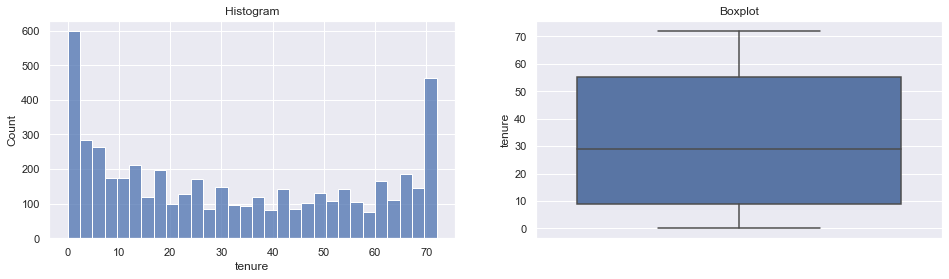

Skewness : 0.24839168191348943


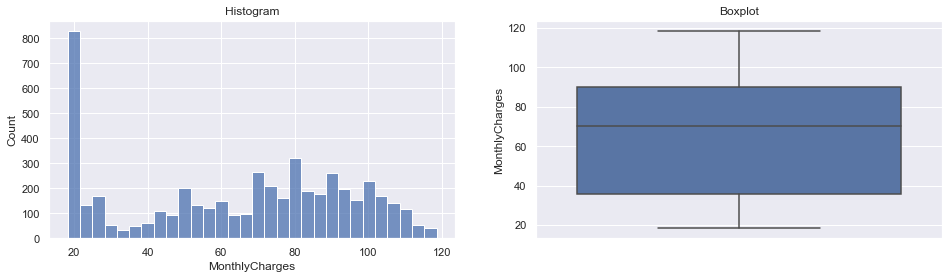

Skewness : -0.22432221427874138


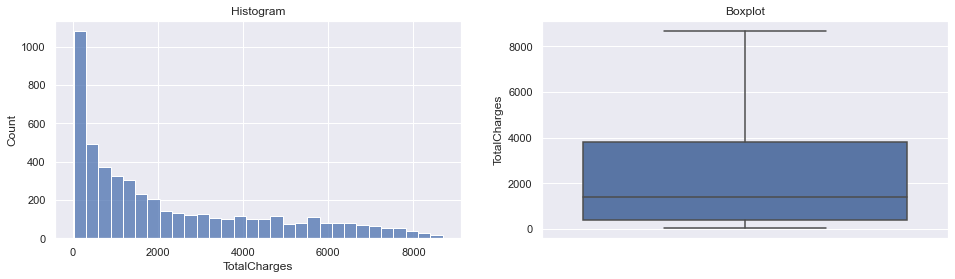

Skewness : 0.9663779392270336


In [31]:
print('Outliers sebelum di handling')
for cols in X_train.describe().columns:
    diagnostic_plots(X_train, cols)
    print('Skewness :', X_train[cols].skew())

In [32]:
# cek semua distribusi dataset

distribusi_data = pd.DataFrame({'column':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
distribusi_data.reset_index(drop=True, inplace=True)
distribusi_data['distribution'] = np.where((distribusi_data['skew'] < 0.5) & (distribusi_data['skew'] > - 0.5) , 'Normal', 'Skew')
distribusi_data

,column,skew,distribution
0,tenure,0.248392,Normal
1,MonthlyCharges,-0.224322,Normal
2,TotalCharges,0.966378,Skew


In [33]:
# pakai fungsi ini kalau distribusi datanya normal
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [34]:
# pakai fungsi ini kalau distribusi datanya skewed

def find_skewed_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - (1.5 * IQR)
    upper = df[variable].quantile(0.75) + (1.5 * IQR)

    return upper, lower

In [35]:
# Atau

X_train_outliers = {
    'column' : [],
    'upper_boundary' : [],
    'lower_boundary' : [],
    'total_right_tail' : [],
    'total_left_tail' : [],
    'total_right_tail_percent' : [],
    'total_left_tail_percent' : [],
    'total_outlier' : [],
    'total_outlier_percent' :[]
}

for row in distribusi_data.index.tolist():
    col = distribusi_data.iloc[row]['column']
    dist = distribusi_data.iloc[row]['distribution']
    if dist == 'Normal' :
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, col)
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, col)


    total_right_tail = len(X_train[X_train[col] > upper_boundary])
    total_left_tail = len(X_train[X_train[col] < lower_boundary])
    total_right_tail_percent = total_right_tail/len(X_train)*100
    total_left_tail_percent = total_left_tail/len(X_train)*100
    total_outlier = total_left_tail + total_right_tail
    total_outlier_percent = total_left_tail_percent + total_right_tail_percent

    X_train_outliers['column'].append(col)
    X_train_outliers['upper_boundary'].append(upper_boundary)
    X_train_outliers['lower_boundary'].append(lower_boundary)
    X_train_outliers['total_right_tail'].append(total_right_tail)
    X_train_outliers['total_left_tail'].append(total_left_tail)
    X_train_outliers['total_right_tail_percent'].append(total_right_tail_percent)
    X_train_outliers['total_left_tail_percent'].append(total_left_tail_percent)
    X_train_outliers['total_outlier'].append(total_outlier)
    X_train_outliers['total_outlier_percent'].append(total_outlier_percent)

X_train_outliers = pd.DataFrame(X_train_outliers)
X_train_outliers

,column,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,tenure,106.161415,-41.563176,0,0,0.0,0.0,0,0.0
1,MonthlyCharges,154.927360,-25.161194,0,0,0.0,0.0,0,0.0
2,TotalCharges,8911.350000,-4703.250000,0,0,0.0,0.0,0,0.0


In [36]:
# Merge Distribusi data dan X_train_outlier

pd.merge(distribusi_data, X_train_outliers, on='column')

,column,skew,distribution,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,tenure,0.248392,Normal,106.161415,-41.563176,0,0,0.0,0.0,0,0.0
1,MonthlyCharges,-0.224322,Normal,154.927360,-25.161194,0,0,0.0,0.0,0,0.0
2,TotalCharges,0.966378,Skew,8911.350000,-4703.250000,0,0,0.0,0.0,0,0.0


### Handling Outliers

Kolom yang memiliki : 
- persentase outlier  < 5% : Trimming
- 5% <= persentase outlier < 15% : Capping
- persentase outlier => 15% : Biarkan

## Missing Values

Cek missing values di kedua dataset

In [37]:
# cek missing values dataset train, test, dan validasi
X_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [38]:
X_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [39]:
X_val.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [40]:
y_train.isna().sum()

0

In [41]:
y_test.isna().sum()

0

In [42]:
y_val.isna().sum()

0

Di X_train baik itu di dataset train, test dan val terdapat missing values pada kolom `TotalCharges`. Harus dihandling terlebih dahulu.

In [44]:
# metode handling missing values

imputer_median = MeanMedianImputer(imputation_method='median', 
                variables=['TotalCharges'])
imputer_median.fit(X_train)
X_train_clean_final = imputer_median.transform(X_train)
X_test_clean_final = imputer_median.transform(X_test)
X_val_clean_final = imputer_median.transform(X_val)


In [45]:
X_train_clean_final.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [46]:
X_test_clean_final.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [47]:
X_val_clean_final.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Features Selection

In [48]:
new_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Analisis feature selection :
- kolom `customerID` tidak akan dipakai karena kolom tersebut hanya berisi nilai-nilai unik yang tidak ada pengaruhnya dengan label.
- kolom `tenure` tidak dipakai sebagai feature karena korelasi dengan label kecil.
- kolom `TotalCharges` tidak dipakai sebagai feature, karena sudah diwakilkan oleh kolom `MonthlyCharges`. Tiap pelanggan pasti membayar tagihan setiap bulannya baik itu kontrak perbulan, setahun atau 2 tahun.
- kolom `PaperlessBilling` tidak dipakai sebagai feature, karena sudah diwakilkan oleh kolom `PaymentMethod`.

In [49]:
X_train = X_train_clean_final.drop(['customerID','tenure','TotalCharges','PaperlessBilling'], axis=1)
X_test = X_test_clean_final.drop(['customerID','tenure','TotalCharges','PaperlessBilling'], axis=1)
X_val = X_val_clean_final.drop(['customerID','tenure','TotalCharges','PaperlessBilling'], axis=1)

In [50]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges
4322,Male,No,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,20.25
1726,Male,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,110.75
183,Female,No,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Electronic check,24.80
6591,Female,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),20.30
4154,Male,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Electronic check,108.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,Female,No,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Two year,Bank transfer (automatic),59.80
2043,Male,Yes,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,101.05
344,Female,No,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Electronic check,44.95
4823,Male,No,Yes,No,Yes,Yes,DSL,No,No,Yes,No,Yes,No,Month-to-month,Electronic check,65.60


## Feature Scaling dan Feature Encoding

Feature Scaling untuk data numerik dan Feature Encoding untuk data kategorik. Ini berguna untuk memudahkan Machine Learning mempelajari data dan membuat model baru.

In [51]:
# split columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :',num_columns)
print('\nCategorical Columns :',cat_columns)

Numerical Columns : ['MonthlyCharges']

Categorical Columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Data numerikal harus di scaling terlebih dahulu.

In [52]:
# Numerical Columns

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]
X_val_num = X_val[num_columns]

# Feature Scaling
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)
X_val_num = scaler.transform(X_val_num)

In [53]:
# Categorical Columns

cat_columns_ordi = ['Partner', 'Dependents', 'SeniorCitizen', 'PhoneService']
cat_columns_ohe = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Categorical with OrdinalEncoder
X_train_cat_ordi = X_train[cat_columns_ordi]
X_test_cat_ordi = X_test[cat_columns_ordi]
X_val_cat_ordi = X_val[cat_columns_ordi]

ordi = OrdinalEncoder()
X_train_cat_ordi = ordi.fit_transform(X_train_cat_ordi)
X_test_cat_ordi = ordi.transform(X_test_cat_ordi)
X_val_cat_ordi = ordi.transform(X_val_cat_ordi)

# Categorical with OneHotEncoder
X_train_cat_ohe = X_train[cat_columns_ohe]
X_test_cat_ohe = X_test[cat_columns_ohe]
X_val_cat_ohe = X_val[cat_columns_ohe]

ohe = OneHotEncoder()
X_train_cat_ohe = ohe.fit_transform(X_train_cat_ohe)
X_test_cat_ohe = ohe.transform(X_test_cat_ohe)
X_val_cat_ohe = ohe.transform(X_val_cat_ohe)


### Merge Result

Gabungkan hasil dari feature scaling dan feature encoding

In [54]:
X_train_final = np.concatenate([X_train_num, X_train_cat_ohe.toarray(), X_train_cat_ordi], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat_ohe.toarray(), X_test_cat_ordi], axis=1)
X_val_final = np.concatenate([X_val_num, X_val_cat_ohe.toarray(), X_val_cat_ordi], axis=1)

### Pipeline Preprocessing

In [56]:
# Pipeline

num_pipe = Pipeline([
    ('scaler', scaler)
])

cat_ordi_pipe = Pipeline([
    ('ordinal', ordi)
])

cat_ohe_pipe = Pipeline([
    ('ohe', ohe)
])

preprocessing = ColumnTransformer(
    [('num', num_pipe, num_columns),
    ('cat_ordi', cat_ordi_pipe, cat_columns_ordi),
    ('cat_ohe', cat_ordi_pipe, cat_columns_ohe)]
)

In [57]:
pipeline = Pipeline([('processing', preprocessing)])

In [58]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('cat_ordi',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'SeniorCitizen',
                                                   'PhoneService']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
        

In [59]:
# Simpan file pipeline
import pickle

with open("pipe_process.pkl", "wb") as pipe_file:
    pickle.dump(pipeline, pipe_file)

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Membuat model dengan menggunakan Tensor-flow.

## 6.1. Sequential API

In [60]:
# Based Model

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(38,)))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                390       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## 6.2. Functional API

In [62]:
# Functional API
data_input = Input(shape=(38,))
hidden_1 = Dense(16, kernel_initializer='RandomNormal', activation='relu')(data_input)
# drop_1 = Dropout(0.50)(hidden_1)
hidden_2 = Dense(8, kernel_initializer='RandomUniform', activation='relu')(hidden_1)
# drop_2 = Dropout(0.50)(hidden_2)
output_layer = Dense(1, activation='sigmoid')(hidden_2)

model_2 = Model(inputs=data_input, outputs=output_layer)

In [63]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                624       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7.1. Model dengan Sequential API

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 7.2. Model dengan Functional API

In [65]:
# opt_Adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



In [66]:
evaluate_metric = pd.DataFrame(columns=['Model', 'accuracy', 'recall (Class = No)'])

## 8.1. Model Evaluation dengan Sequential API

In [67]:
history = model.fit(X_train_final, y_train, epochs=100, batch_size=100, validation_data=(X_val_final, y_val))

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.7720 - accuracy: 0.4646 - val_loss: 0.6385 - val_accuracy: 0.6187
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7001 - val_loss: 0.5302 - val_accuracy: 0.7266
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7345 - val_loss: 0.4838 - val_accuracy: 0.7410
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7473 - val_loss: 0.4557 - val_accuracy: 0.7572
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7761 - val_loss: 0.4413 - val_accuracy: 0.7770
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7817 - val_loss: 0.4350 - val_accuracy: 0.7788
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7821 - val_loss: 0.4320 - val_accuracy: 0.7842
Epoch 8/100
5

In [68]:
metrics = pd.DataFrame(history.history)
metrics.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.772019,0.464586,0.638489,0.618705
1,0.583293,0.700080,0.530234,0.726619
2,0.517092,0.734494,0.483843,0.741007
3,0.482635,0.747299,0.455680,0.757194
4,0.461542,0.776110,0.441277,0.776978
5,0.450057,0.781713,0.434967,0.778777
6,0.443435,0.782113,0.431983,0.784173
7,0.439508,0.784914,0.432181,0.784173
8,0.436643,0.787315,0.431210,0.782374
9,0.434634,0.785914,0.434433,0.780576


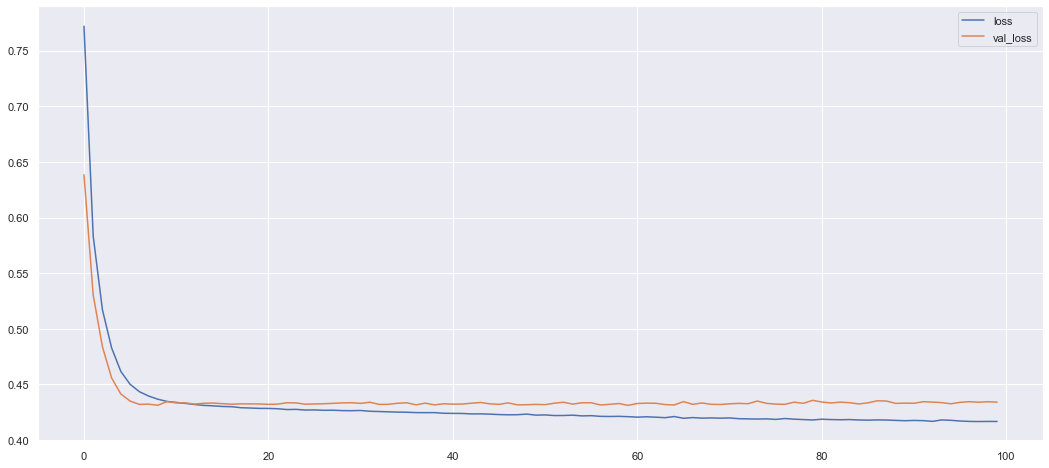

In [69]:
metrics[['loss','val_loss']].plot();

In [70]:
y_pred = model.predict(X_test_final)
y_pred = np.where(y_pred < 0.5, 0, 1).squeeze()

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1022
           1       0.59      0.52      0.56       367

    accuracy                           0.78      1389
   macro avg       0.72      0.70      0.70      1389
weighted avg       0.77      0.78      0.77      1389



In [102]:
evaluate_metric.loc[0] = ['Sequential Test', 0.78, 0.87]

## 8.2. Model Evaluation dengan Functional API

In [73]:
# Functional API
history_2 = model_2.fit(X_train_final, y_train, epochs=100, batch_size=100, validation_data=(X_val_final, y_val))

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.7223 - val_loss: 0.5870 - val_accuracy: 0.7392
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7387 - val_loss: 0.4583 - val_accuracy: 0.7626
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7803 - val_loss: 0.4318 - val_accuracy: 0.7824
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7849 - val_loss: 0.4289 - val_accuracy: 0.7878
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.7899 - val_loss: 0.4289 - val_accuracy: 0.7878
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7887 - val_loss: 0.4275 - val_accuracy: 0.7842
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.7913 - val_loss: 0.4282 - val_accuracy: 0.7788
Epoch 8/100
5

In [74]:
metrics_2 = pd.DataFrame(history_2.history)
metrics_2.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.657446,0.722289,0.586973,0.739209
1,0.522406,0.738696,0.458266,0.762590
2,0.454310,0.780312,0.431770,0.782374
3,0.440530,0.784914,0.428883,0.787770
4,0.436288,0.789916,0.428860,0.787770
5,0.434316,0.788715,0.427530,0.784173
6,0.432635,0.791317,0.428168,0.778777
7,0.431347,0.789716,0.428223,0.778777
8,0.430805,0.789516,0.429213,0.784173
9,0.430680,0.789116,0.429429,0.782374


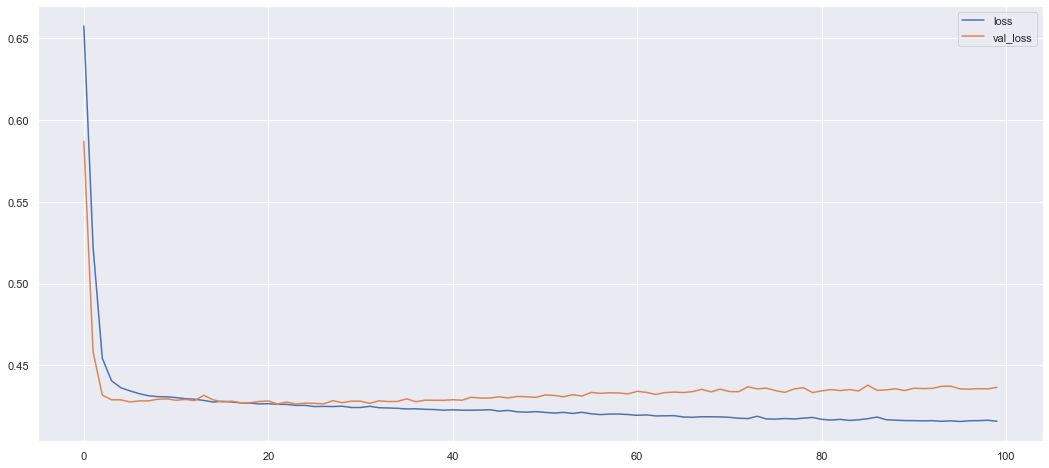

In [75]:
metrics_2[['loss','val_loss']].plot();

In [76]:
y_pred_2 = model_2.predict(X_test_final)
y_pred_2 = np.where(y_pred_2 < 0.5, 0, 1).squeeze()

In [77]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1022
           1       0.62      0.53      0.57       367

    accuracy                           0.79      1389
   macro avg       0.73      0.71      0.72      1389
weighted avg       0.78      0.79      0.78      1389



In [103]:
evaluate_metric.loc[1] = ['Functional Test', 0.79, 0.88]

## 8.3. Using Data Pipeline in Model TensorFlow

In [79]:
X_train_pipe = preprocessing.fit_transform(X_train)
X_test_pipe = preprocessing.transform(X_test)
X_val_pipe = preprocessing.transform(X_val)

In [80]:
# Train-set
train_df = tf.data.Dataset.from_tensor_slices((X_train_pipe, y_train))

## Shuffle and slice train dataset
train_df = train_df.shuffle(buffer_size=1024).batch(100)

# Test-set
test_df = tf.data.Dataset.from_tensor_slices((X_test_pipe, y_test))
test_df = test_df.batch(100)

# Validation-set
val_df = tf.data.Dataset.from_tensor_slices((X_val_pipe, y_val))
val_df = val_df.batch(100)

# Create Model - using Sequential API
model_pipe = Sequential()
model_pipe.add(Dense(10, input_shape=(16,), kernel_initializer='RandomNormal', activation="relu"))
model_pipe.add(Dropout(0.5))
model_pipe.add(Dense(10, kernel_initializer='RandomUniform', activation="relu"))
model_pipe.add(Dropout(0.5))
model_pipe.add(Dense(1, activation="sigmoid"))
model_pipe.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# fit model
history_pipe = model_pipe.fit(train_df,epochs=100, validation_data=val_df)

## Evaluate on a dataset.
print("\nEvaluate on test data")
result = model_pipe.evaluate(test_df)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.7265 - val_loss: 0.6135 - val_accuracy: 0.7392
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7351 - val_loss: 0.5247 - val_accuracy: 0.7392
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7379 - val_loss: 0.4811 - val_accuracy: 0.7392
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7499 - val_loss: 0.4568 - val_accuracy: 0.7716
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7575 - val_loss: 0.4495 - val_accuracy: 0.7770
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7465 - val_loss: 0.4479 - val_accuracy: 0.7770
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7613 - val_loss: 0.4465 - val_accuracy: 0.7788
Epoch 8/100
5

In [81]:
metrics_pipe = pd.DataFrame(history_pipe.history)
metrics_pipe.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.662187,0.726491,0.613499,0.739209
1,0.587145,0.735094,0.524670,0.739209
2,0.545259,0.737895,0.481112,0.739209
3,0.514633,0.749900,0.456781,0.771583
4,0.498374,0.757503,0.449523,0.776978
5,0.496826,0.746499,0.447899,0.776978
6,0.492545,0.761304,0.446469,0.778777
7,0.490171,0.754702,0.443650,0.771583
8,0.480077,0.759104,0.441613,0.776978
9,0.474249,0.758703,0.440509,0.782374


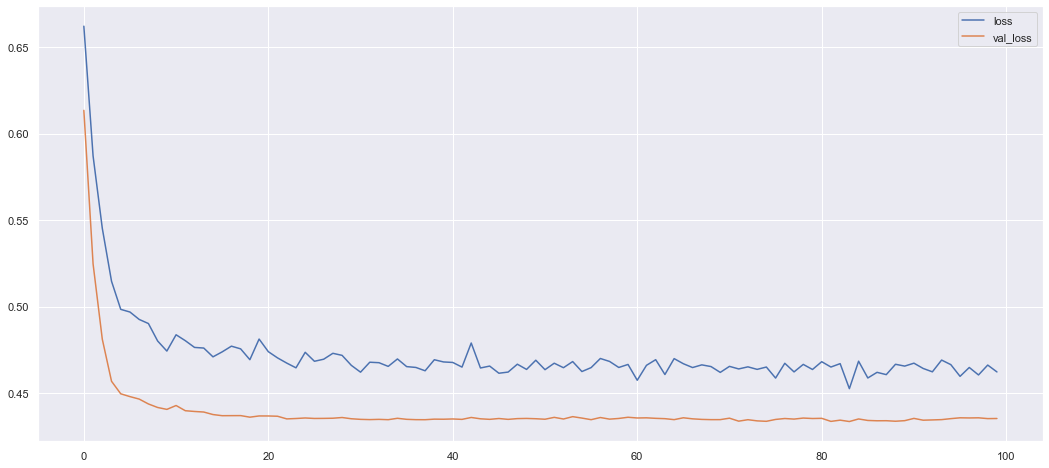

In [82]:
metrics_pipe[['loss', 'val_loss']].plot();

In [83]:
y_pred_pipe = model_pipe.predict(X_test_pipe)
y_pred_pipe = np.where(y_pred_pipe < 0.5, 0, 1).squeeze()

In [84]:
print(classification_report(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1022
           1       0.60      0.39      0.47       367

    accuracy                           0.77      1389
   macro avg       0.70      0.65      0.66      1389
weighted avg       0.75      0.77      0.75      1389



In [104]:
evaluate_metric.loc[2] = ['Sequential Test using Pipeline', 0.77, 0.91]

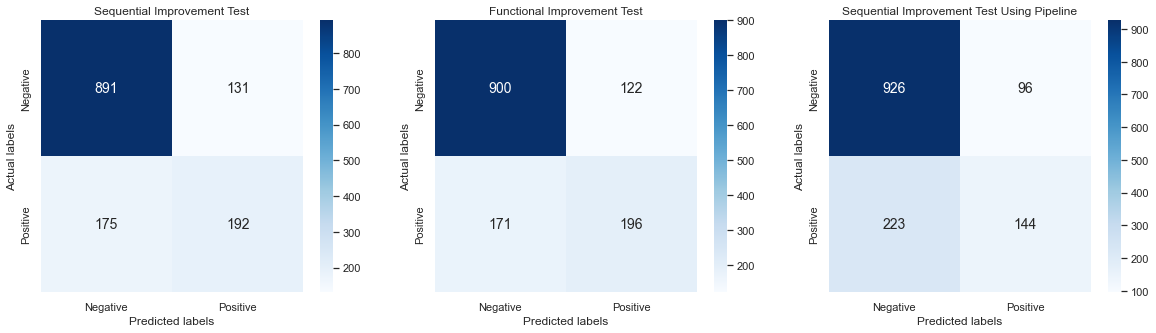

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
test_matrix_1= confusion_matrix(y_test, y_pred)
ax = sns.heatmap(test_matrix_1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.title("Sequential Improvement Test")

plt.subplot(1,3,2)
test_matrix_2= confusion_matrix(y_test, y_pred_2)
ax = sns.heatmap(test_matrix_2, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.title("Functional Improvement Test")

plt.subplot(1,3,3)
test_matrix_2= confusion_matrix(y_test, y_pred_pipe)
ax = sns.heatmap(test_matrix_2, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.title("Sequential Improvement Test Using Pipeline")

plt.show()

In [105]:
evaluate_metric

,Model,accuracy,recall (Class = No)
0,Sequential Test,0.78,0.87
1,Functional Test,0.79,0.88
2,Sequential Test using Pipeline,0.77,0.91


Catatan : Tiap model memiliki perlakuan yang berbeda seperti menambahkan hidden layer, menambah hyperparameter, dll. Tidak ada perbedaan secara signifikan pada ketiga model yang telah dibuat, tujuannya hanya mencoba membuat model tensorflow dengan cara-cara yang berbeda (Sequential API dan Functional API).

# 9. Model Saving
Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [88]:
# Simpan model tensorflow
model_pipe.save('Model.h5')
print('Model saved!')

Model saved!


# 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [89]:
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8707-RMEZH,Female,Yes,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,0
1,1216-BGTSP,Male,No,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,0
2,5118-MUEYH,Female,No,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,0
3,4821-SJHJV,Female,No,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,0
4,8245-UMPYT,Female,Yes,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4094-NSEDU,Female,Yes,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.25,1973.75,1
96,5149-TGWDZ,Female,No,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,104.55,2239.40,0
97,3932-CMDTD,Female,No,No,No,4,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,105.65,443.90,1
98,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0


### Split Feature and Target - Inference dataset

In [90]:
# Split X dan y
X_inf = df_inf.drop(['Churn'], axis=1)
y_inf = df_inf['Churn']

### Missing Values - Inference dataset

In [91]:
X_inf.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [92]:
# drop missing values
X_inf.dropna(axis=0, inplace=True)

### Feature Scaling and Encoding - Inference dataset

In [95]:
X_inf_final = preprocessing.transform(X_inf)

### Model Predict - Inference dataset

Kami akan prediksi churn dengan menggunakan model dari data pipeline yang telah dibuat sebelumnya.

In [96]:
# Predict

y_pred_inf = model_pipe.predict(X_inf_final)
y_pred_inf = np.where(y_pred_inf < 0.5, 0, 1).squeeze()
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn - prediction'])
y_pred_inf.replace({0 : 'No', 1 :'Yes'}, inplace=True)
y_pred_inf

,Churn - prediction
0,No
1,No
2,No
3,No
4,Yes
...,...
94,No
95,Yes
96,No
97,No


In [97]:
df_inf_all = pd.concat([X_inf, y_pred_inf], axis=1)
df_inf_all.dropna(axis=0, inplace=True)
df_inf_all

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn - prediction
0,8707-RMEZH,Female,Yes,Yes,No,69.0,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
1,1216-BGTSP,Male,No,No,No,45.0,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
2,5118-MUEYH,Female,No,Yes,No,48.0,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3,4821-SJHJV,Female,No,Yes,Yes,32.0,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
4,8245-UMPYT,Female,Yes,No,No,16.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0277-ORXQS,Male,No,Yes,Yes,66.0,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),50.55,3364.55,No
94,0572-ZJKLT,Female,No,Yes,Yes,46.0,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.20,No
95,4094-NSEDU,Female,Yes,No,No,21.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.25,1973.75,Yes
96,5149-TGWDZ,Female,No,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,104.55,2239.40,No


# 11. Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Berdasarkan EDA :
  - Pelanggan yang paling banyak pergi atau meninggalkan langganan produk selama setahun terakhir adalah pelanggan berjenis kelamin perempuan. Laki-laki juga terbilang banyak hanya selisih 9 orang. Meskipun begitu, kami masih bisa mempertahankan pelanggan kami untuk menggunakan produk layanan Telco.
  - Meskipun beberapa pelanggan sudah pergi atau tidak berlangganan sejak sebulan terakhir, terlihat hasil pendapatan kami dari customer yang membayar total charges (total tagihan) dari customer yang tetap berlangganan pada produk kami masih terbilang besar, yaitu sebesar 13193241.8 (13 juta dollars).
  - Pelanggan kami lebih banyak mengambil kontrak penggunaan produk layanan Telco secara Month-to-month dibanding per satu tahun atau dua tahun. 
  - Tagihan perbulan untuk kontrak Month-to-month lebih mahal dibanding dengan kontrak pertahun dan dua tahun.
  - Kebanyakan pelanggan yang memiliki pasangan dan tangungan masih setia memakai layanan kami. Sehingga tidak terlalu mempengaruhi pelanggan tersebut pergi dari layanan Telco.

2. Berdasarkan Model Evaluasi :
  - Berdasarkan akurasi diantara 3 model yang sudah dibuat, rata-rata model menghasilkan akurasi sekitar 78%.
  - Saat beberapa kali di training ulang, hasil `classificaton report` dan grafik loss selalu berubah-ubah. Ini wajar karena data yang kami pakai kecil, sedangkan model yang dibuat sangat Powerful.
  - Karena kasus kami adalah mempertahankan pelanggan agar tetap menggunakan produk kami, kami akan membuat sebisa mungkin prediksi pelanggan yang tidak berlangganan yang harusnya berlangganan kecil. Ini bisa berbahaya jika pelanggan tidak mendapatkan layanan produk kami yang baru karena dideteksi pelanggan tersebut tidak berlangganan lagi.
  -  Kami anggap pelanggan tetap adalah positif dan pelanggan pergi adalah negatif. Maka dari itu, menurut kami hal yang paling berbahaya adalah `false negatif`. Kami harus melihat nilai recall-nya. Jika nilai recall tinggi, maka `false negatif` kecil.